<a href="https://colab.research.google.com/github/frozoni/frozoni/blob/main/SiCoop_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

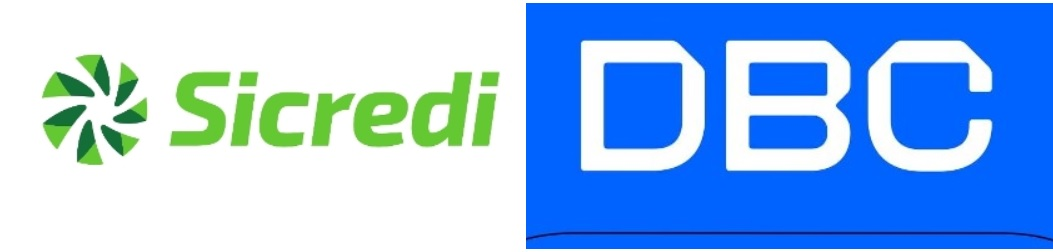

# **INSTALAÇÃO DE BIBLIOTECAS E DEPÊNCIAS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pymysql

In [ ]:
pip install pyspark

In [ ]:
import sqlalchemy
import pymysql
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.engine import cursor
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import *

In [ ]:
spark = SparkSession.builder.appName("SQLiteToDataFrame").getOrCreate()

# **CRIAÇÃO DO BANCO DE DADOS NO COLAB**

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/SiCoop_DB.db')

# **CRIAÇÃO DE TABELAS**

In [ ]:
conn.execute('''
CREATE TABLE movimento (
	id INTEGER PRIMARY KEY ,
	vlr_transacao DECIMAL(10,2),
	des_transacao varchar(255),
	data_movimento DATETIME,
	id_cartao  VARCHAR(50)
);

''')
conn.commit()

In [ ]:
conn.execute('''
CREATE TABLE cartao (
  id_cartao VARCHAR(50) PRIMARY KEY,
  num_cartao BIGINT,
  nom_impresso varchar(100),
  id_conta INTEGER,
  id_associado INTEGER
);
''')
conn.commit()

In [ ]:
conn.execute('''
CREATE TABLE conta (
	id_conta INTEGER PRIMARY KEY,
	tipo VARCHAR(100),
	data_criacao DATETIME,
	id_associado INTEGER
);
''')
conn.commit()

In [ ]:
conn.execute('''
CREATE TABLE associado (
	id_associado INTEGER PRIMARY KEY ,
	nome varchar(100),
	sobrenome varchar(100),
	idade INTEGER,
	email varchar(255)
);
''')
conn.commit()

# **INSERÇÃO DE DADOS**


In [ ]:
conn.execute("INSERT INTO movimento VALUES(01, 50.00, 'Netshoes', '2020-01-27 12:00:00', 'Visa01');")
conn.execute("INSERT INTO movimento VALUES(02, 75.00, 'Amazon', '2020-01-28 13:30:00', 'Mastercard01');")
conn.execute("INSERT INTO movimento VALUES(03, 30.50, 'Walmart', '2020-01-29 15:15:00', 'Visa02');")
conn.execute("INSERT INTO movimento VALUES(04, 20.25, 'Ebay', '2020-01-30 09:45:00', 'Amex01');")
conn.execute("INSERT INTO movimento VALUES(05, 45.75, 'Eletroshop', '2020-02-01 14:20:00', 'Mastercard02');")
conn.execute("INSERT INTO movimento VALUES(06, 22.90, 'Target', '2020-02-02 16:40:00', 'Visa03');")
conn.execute("INSERT INTO movimento VALUES(07, 18.60, 'Best Buy', '2020-02-03 11:10:00', 'Amex02');")
conn.execute("INSERT INTO movimento VALUES(08, 67.20, 'Walmart', '2020-02-04 10:30:00', 'Visa04');")
conn.execute("INSERT INTO movimento VALUES(09, 12.50, 'Amazon', '2020-02-05 17:25:00', 'Mastercard03');")
conn.execute("INSERT INTO movimento VALUES(10, 38.90, 'Apple Store', '2020-02-06 14:55:00', 'Amex03');")
conn.execute("INSERT INTO movimento VALUES(11, 54.75, 'Nike', '2020-02-07 09:20:00', 'Visa05');")
conn.execute("INSERT INTO movimento VALUES(12, 29.99, 'Starbucks', '2020-02-08 13:45:00', 'Mastercard04');")
conn.execute("INSERT INTO movimento VALUES(13, 14.25, 'H&M', '2020-02-09 11:30:00', 'Visa06');")
conn.execute("INSERT INTO movimento VALUES(14, 40.50, 'Zara', '2020-02-10 14:10:00', 'Amex04');")
conn.execute("INSERT INTO movimento VALUES(15, 75.80, 'McDonald', '2020-02-11 18:05:00', 'Mastercard05');")
conn.execute("INSERT INTO movimento VALUES(16, 27.60, 'Burger King', '2020-02-12 16:15:00', 'Visa07');")
conn.execute("INSERT INTO movimento VALUES(17, 36.40, 'Subway', '2020-02-13 10:55:00', 'Mastercard06');")
conn.execute("INSERT INTO movimento VALUES(18, 19.95, 'Domino', '2020-02-14 12:40:00', 'Amex05');")
conn.execute("INSERT INTO movimento VALUES(19, 48.30, 'KFC', '2020-02-15 09:10:00', 'Visa08');")
conn.execute("INSERT INTO movimento VALUES(20, 63.70, 'Pizza Hut', '2020-02-16 15:30:00', 'Mastercard07');")
conn.execute("INSERT INTO movimento VALUES(21, 25.50, 'Coca-Cola', '2020-02-17 17:20:00', 'Visa09');")
conn.execute("INSERT INTO movimento VALUES(22, 32.75, 'Pepsi', '2020-02-18 11:50:00', 'Amex06');")
conn.execute("INSERT INTO movimento VALUES(23, 15.40, 'Fanta', '2020-02-19 14:45:00', 'Visa10');")
conn.execute("INSERT INTO movimento VALUES(24, 55.00, 'Ford', '2020-02-20 13:05:00', 'Mastercard08');")
conn.execute("INSERT INTO movimento VALUES(25, 40.20, 'Toyota', '2020-02-21 09:40:00', 'Amex07');")
conn.execute("INSERT INTO movimento VALUES(26, 80.90, 'Chevrolet', '2020-02-22 14:35:00', 'Visa11');")
conn.execute("INSERT INTO movimento VALUES(27, 28.60, 'Honda', '2020-02-23 16:50:00', 'Mastercard09');")
conn.execute("INSERT INTO movimento VALUES(28, 22.75, 'Nissan', '2020-02-24 10:25:00', 'Visa12');")
conn.execute("INSERT INTO movimento VALUES(29, 75.40, 'Mercedes-Benz', '2020-02-25 15:15:00', 'Amex08');")
conn.execute("INSERT INTO movimento VALUES(30, 67.80, 'BMW', '2020-02-26 12:20:00', 'Mastercard10');")
conn.commit()

In [ ]:
conn.execute("INSERT INTO conta VALUES(0101, 'Conta Corrente', '2000-05-01 00:00:00', 001);")
conn.execute("INSERT INTO conta VALUES(0102, 'Conta Corrente', '2005-07-03 00:00:00', 002);")
conn.execute("INSERT INTO conta VALUES(0103, 'Conta Corrente', '2010-12-12 00:00:00', 003);")
conn.execute("INSERT INTO conta VALUES(0104, 'Conta Corrente', '2012-09-22 00:00:00', 004);")
conn.execute("INSERT INTO conta VALUES(0105, 'Conta Corrente', '2003-03-15 00:00:00', 005);")
conn.execute("INSERT INTO conta VALUES(0106, 'Conta Corrente', '2008-08-10 00:00:00', 006);")
conn.execute("INSERT INTO conta VALUES(0107, 'Conta Corrente', '2015-06-19 00:00:00', 007);")
conn.execute("INSERT INTO conta VALUES(0108, 'Conta Corrente', '2011-02-27 00:00:00', 008);")
conn.execute("INSERT INTO conta VALUES(0109, 'Conta Corrente', '2007-11-07 00:00:00', 009);")
conn.execute("INSERT INTO conta VALUES(0110, 'Conta Corrente', '2005-04-14 00:00:00', 010);")
conn.execute("INSERT INTO conta VALUES(0111, 'Conta Corrente', '2013-10-09 00:00:00', 011);")
conn.execute("INSERT INTO conta VALUES(0112, 'Conta Corrente', '2018-01-06 00:00:00', 012);")
conn.execute("INSERT INTO conta VALUES(0113, 'Conta Corrente', '2016-05-20 00:00:00', 013);")
conn.execute("INSERT INTO conta VALUES(0114, 'Conta Corrente', '2014-09-18 00:00:00', 014);")
conn.execute("INSERT INTO conta VALUES(0115, 'Conta Corrente', '2009-03-03 00:00:00', 015);")
conn.execute("INSERT INTO conta VALUES(0116, 'Conta Corrente', '2017-12-30 00:00:00', 016);")
conn.execute("INSERT INTO conta VALUES(0117, 'Conta Corrente', '2006-08-25 00:00:00', 017);")
conn.execute("INSERT INTO conta VALUES(0118, 'Conta Corrente', '2011-06-11 00:00:00', 018);")
conn.execute("INSERT INTO conta VALUES(0119, 'Conta Corrente', '2012-04-02 00:00:00', 019);")
conn.execute("INSERT INTO conta VALUES(0120, 'Conta Corrente', '2019-07-12 00:00:00', 020);")
conn.execute("INSERT INTO conta VALUES(0121, 'Conta Corrente', '2010-11-29 00:00:00', 021);")
conn.execute("INSERT INTO conta VALUES(0122, 'Conta Corrente', '2014-01-05 00:00:00', 022);")
conn.execute("INSERT INTO conta VALUES(0123, 'Conta Corrente', '2008-06-08 00:00:00', 023);")
conn.execute("INSERT INTO conta VALUES(0124, 'Conta Corrente', '2015-09-17 00:00:00', 024);")
conn.execute("INSERT INTO conta VALUES(0125, 'Conta Corrente', '2002-02-13 00:00:00', 025);")
conn.execute("INSERT INTO conta VALUES(0126, 'Conta Corrente', '2017-04-21 00:00:00', 026);")
conn.execute("INSERT INTO conta VALUES(0127, 'Conta Corrente', '2013-10-04 00:00:00', 027);")
conn.execute("INSERT INTO conta VALUES(0128, 'Conta Corrente', '2016-07-26 00:00:00', 028);")
conn.execute("INSERT INTO conta VALUES(0129, 'Conta Corrente', '2011-12-10 00:00:00', 029);")
conn.execute("INSERT INTO conta VALUES(0130, 'Conta Corrente', '2006-03-09 00:00:00', 030);")
conn.commit()

In [ ]:
conn.execute("INSERT INTO cartao VALUES('Visa01', '6334583651368754', 'Axel Hoffman', '0101', '001');")
conn.execute("INSERT INTO cartao VALUES('Mastercard01', '5450787612345678', 'Maria Silva', '0102', '002');")
conn.execute("INSERT INTO cartao VALUES('Visa02', '4567890123456789', 'João Pereira', '0103', '003');")
conn.execute("INSERT INTO cartao VALUES('Amex01', '378282246310005', 'Luis Santos', '0104', '004');")
conn.execute("INSERT INTO cartao VALUES('Mastercard02', '5123456789012345', 'Laura Oliveira', '0105', '005');")
conn.execute("INSERT INTO cartao VALUES('Visa03', '6011223344556677', 'Carlos Ferreira', '0106', '006');")
conn.execute("INSERT INTO cartao VALUES('Amex02', '371449635398831', 'Ana Souza', '0107', '007');")
conn.execute("INSERT INTO cartao VALUES('Visa04', '4917951125400640', 'Pedro Rodrigues', '0108', '008');")
conn.execute("INSERT INTO cartao VALUES('Mastercard03', '5105105105105100', 'Mariana Santos', '0109', '009');")
conn.execute("INSERT INTO cartao VALUES('Amex03', '37240907424042', 'Ricardo Pereira', '0110', '010');")
conn.execute("INSERT INTO cartao VALUES('Visa05', '4040400040004000', 'Juliana Oliveira', '0111', '011');")
conn.execute("INSERT INTO cartao VALUES('Mastercard04', '5555555555555555', 'Lucas Silva', '0112', '012');")
conn.execute("INSERT INTO cartao VALUES('Visa06', '4111111111111111', 'Carla Rodrigues', '0113', '013');")
conn.execute("INSERT INTO cartao VALUES('Amex04', '378734493671000', 'Daniel Ferreira', '0114', '014');")
conn.execute("INSERT INTO cartao VALUES('Visa07', '4916749677585942', 'Isabela Souza', '0115', '015');")
conn.execute("INSERT INTO cartao VALUES('Mastercard05', '5204140234347679', 'Felipe Oliveira', '0116', '016');")
conn.execute("INSERT INTO cartao VALUES('Visa08', '4984511671178312', 'Renata Pereira', '0117', '017');")
conn.execute("INSERT INTO cartao VALUES('Mastercard06', '5301055050054402', 'Marcos Santos', '0118', '018');")
conn.execute("INSERT INTO cartao VALUES('Amex05', '370266620070673', 'Camila Rodrigues', '0119', '019');")
conn.execute("INSERT INTO cartao VALUES('Visa09', '4556789012345670', 'Gustavo Ferreira', '0120', '020');")
conn.execute("INSERT INTO cartao VALUES('Mastercard07', '5181188118811881', 'Aline Oliveira', '0121', '021');")
conn.execute("INSERT INTO cartao VALUES('Amex06', '3717171717171717', 'Luciana Silva', '0122', '022');")
conn.execute("INSERT INTO cartao VALUES('Visa10', '4012345678901234', 'Thiago Rodrigues', '0123', '023');")
conn.execute("INSERT INTO cartao VALUES('Mastercard08', '4111111111111111', 'Roberto Pereira', '0124', '024');")
conn.execute("INSERT INTO cartao VALUES('Amex07', '3702000000000002', 'Patricia Souza', '0125', '025');")
conn.execute("INSERT INTO cartao VALUES('Visa11', '5555555555555555', 'Henrique Oliveira', '0126', '026');")
conn.execute("INSERT INTO cartao VALUES('Mastercard09', '5123456789012345', 'Cristina Santos', '0127', '027');")
conn.execute("INSERT INTO cartao VALUES('Visa12', '6011223344556677', 'Eduardo Ferreira', '0128', '028');")
conn.execute("INSERT INTO cartao VALUES('Amex08', '371449635398831', 'Larissa Rodrigues', '0129', '029');")
conn.execute("INSERT INTO cartao VALUES('Mastercard10', '4917951125400640', 'Fernando Pereira', '0130', '030');")
conn.commit()

In [ ]:
conn.execute("INSERT INTO associado VALUES(001, 'Axel', 'Hoffman', 45, 'pellentesque.massa@yahoo.edu');")
conn.execute("INSERT INTO associado VALUES(002, 'Maria', 'Silva', 35, 'maria.silva@email.com');")
conn.execute("INSERT INTO associado VALUES(003, 'João', 'Pereira', 28, 'joao.pereira@email.com');")
conn.execute("INSERT INTO associado VALUES(004, 'Luis', 'Santos', 40, 'luis.santos@email.com');")
conn.execute("INSERT INTO associado VALUES(005, 'Laura', 'Oliveira', 33, 'laura.oliveira@email.com');")
conn.execute("INSERT INTO associado VALUES(006, 'Carlos', 'Ferreira', 37, 'carlos.ferreira@email.com');")
conn.execute("INSERT INTO associado VALUES(007, 'Ana', 'Souza', 29, 'ana.souza@email.com');")
conn.execute("INSERT INTO associado VALUES(008, 'Pedro', 'Rodrigues', 42, 'pedro.rodrigues@email.com');")
conn.execute("INSERT INTO associado VALUES(009, 'Mariana', 'Santos', 31, 'mariana.santos@email.com');")
conn.execute("INSERT INTO associado VALUES(010, 'Ricardo', 'Pereira', 36, 'ricardo.pereira@email.com');")
conn.execute("INSERT INTO associado VALUES(011, 'Juliana', 'Oliveira', 27, 'juliana.oliveira@email.com');")
conn.execute("INSERT INTO associado VALUES(012, 'Lucas', 'Silva', 34, 'lucas.silva@email.com');")
conn.execute("INSERT INTO associado VALUES(013, 'Carla', 'Rodrigues', 38, 'carla.rodrigues@email.com');")
conn.execute("INSERT INTO associado VALUES(014, 'Daniel', 'Ferreira', 41, 'daniel.ferreira@email.com');")
conn.execute("INSERT INTO associado VALUES(015, 'Isabela', 'Souza', 26, 'isabela.souza@email.com');")
conn.execute("INSERT INTO associado VALUES(016, 'Felipe', 'Oliveira', 30, 'felipe.oliveira@email.com');")
conn.execute("INSERT INTO associado VALUES(017, 'Renata', 'Pereira', 32, 'renata.pereira@email.com');")
conn.execute("INSERT INTO associado VALUES(018, 'Marcos', 'Santos', 39, 'marcos.santos@email.com');")
conn.execute("INSERT INTO associado VALUES(019, 'Camila', 'Rodrigues', 43, 'camila.rodrigues@email.com');")
conn.execute("INSERT INTO associado VALUES(020, 'Gustavo', 'Ferreira', 28, 'gustavo.ferreira@email.com');")
conn.execute("INSERT INTO associado VALUES(021, 'Aline', 'Oliveira', 35, 'aline.oliveira@email.com');")
conn.execute("INSERT INTO associado VALUES(022, 'Luciana', 'Silva', 31, 'luciana.silva@email.com');")
conn.execute("INSERT INTO associado VALUES(023, 'Thiago', 'Rodrigues', 30, 'thiago.rodrigues@email.com');")
conn.execute("INSERT INTO associado VALUES(024, 'Roberto', 'Pereira', 37, 'roberto.pereira@email.com');")
conn.execute("INSERT INTO associado VALUES(025, 'Patricia', 'Souza', 33, 'patricia.souza@email.com');")
conn.execute("INSERT INTO associado VALUES(026, 'Henrique', 'Oliveira', 29, 'henrique.oliveira@email.com');")
conn.execute("INSERT INTO associado VALUES(027, 'Cristina', 'Santos', 35, 'cristina.santos@email.com');")
conn.execute("INSERT INTO associado VALUES(028, 'Eduardo', 'Ferreira', 38, 'eduardo.ferreira@email.com');")
conn.execute("INSERT INTO associado VALUES(029, 'Larissa', 'Rodrigues', 32, 'larissa.rodrigues@email.com');")
conn.execute("INSERT INTO associado VALUES(030, 'Fernando', 'Pereira', 36, 'fernando.pereira@email.com');")
conn.commit()

# **Criação do DF TB_Movimento**

In [ ]:
qry_movimento = """
SELECT * FROM movimento
"""
df_movimento = pd.read_sql_query(qry_movimento, conn)
df_movimento.head()

,id,vlr_transacao,des_transacao,data_movimento,id_cartao
0,1,50.00,Netshoes,2020-01-27 12:00:00,Visa01
1,2,75.00,Amazon,2020-01-28 13:30:00,Mastercard01
2,3,30.50,Walmart,2020-01-29 15:15:00,Visa02
3,4,20.25,Ebay,2020-01-30 09:45:00,Amex01
4,5,45.75,Eletroshop,2020-02-01 14:20:00,Mastercard02


In [ ]:
df_movimento = spark.createDataFrame(df_movimento)

In [ ]:
df_movimento.show()

+---+-------------+-------------+-------------------+------------+
| id|vlr_transacao|des_transacao|     data_movimento|   id_cartao|
+---+-------------+-------------+-------------------+------------+
|  1|         50.0|     Netshoes|2020-01-27 12:00:00|      Visa01|
|  2|         75.0|       Amazon|2020-01-28 13:30:00|Mastercard01|
|  3|         30.5|      Walmart|2020-01-29 15:15:00|      Visa02|
|  4|        20.25|         Ebay|2020-01-30 09:45:00|      Amex01|
|  5|        45.75|   Eletroshop|2020-02-01 14:20:00|Mastercard02|
|  6|         22.9|       Target|2020-02-02 16:40:00|      Visa03|
|  7|         18.6|     Best Buy|2020-02-03 11:10:00|      Amex02|
|  8|         67.2|      Walmart|2020-02-04 10:30:00|      Visa04|
|  9|         12.5|       Amazon|2020-02-05 17:25:00|Mastercard03|
| 10|         38.9|  Apple Store|2020-02-06 14:55:00|      Amex03|
| 11|        54.75|         Nike|2020-02-07 09:20:00|      Visa05|
| 12|        29.99|    Starbucks|2020-02-08 13:45:00|Mastercar

# **Criação do DF TB_Conta**

In [ ]:
qry_conta= """
SELECT * FROM conta
"""
df_conta = pd.read_sql_query(qry_conta, conn)
df_conta.head()

,id_conta,tipo,data_criacao,id_associado
0,101,Conta Corrente,2000-05-01 00:00:00,1
1,102,Conta Corrente,2005-07-03 00:00:00,2
2,103,Conta Corrente,2010-12-12 00:00:00,3
3,104,Conta Corrente,2012-09-22 00:00:00,4
4,105,Conta Corrente,2003-03-15 00:00:00,5


In [ ]:
df_conta = spark.createDataFrame(df_conta)

In [ ]:
df_conta.show()

+--------+--------------+-------------------+------------+
|id_conta|          tipo|       data_criacao|id_associado|
+--------+--------------+-------------------+------------+
|     101|Conta Corrente|2000-05-01 00:00:00|           1|
|     102|Conta Corrente|2005-07-03 00:00:00|           2|
|     103|Conta Corrente|2010-12-12 00:00:00|           3|
|     104|Conta Corrente|2012-09-22 00:00:00|           4|
|     105|Conta Corrente|2003-03-15 00:00:00|           5|
|     106|Conta Corrente|2008-08-10 00:00:00|           6|
|     107|Conta Corrente|2015-06-19 00:00:00|           7|
|     108|Conta Corrente|2011-02-27 00:00:00|           8|
|     109|Conta Corrente|2007-11-07 00:00:00|           9|
|     110|Conta Corrente|2005-04-14 00:00:00|          10|
|     111|Conta Corrente|2013-10-09 00:00:00|          11|
|     112|Conta Corrente|2018-01-06 00:00:00|          12|
|     113|Conta Corrente|2016-05-20 00:00:00|          13|
|     114|Conta Corrente|2014-09-18 00:00:00|          1

# **Criação do DF TB_Associado**



In [ ]:
qry_associado= """
SELECT * FROM associado
"""
df_associado = pd.read_sql_query(qry_associado, conn)
df_associado.head()

,id_associado,nome,sobrenome,idade,email
0,1,Axel,Hoffman,45,pellentesque.massa@yahoo.edu
1,2,Maria,Silva,35,maria.silva@email.com
2,3,João,Pereira,28,joao.pereira@email.com
3,4,Luis,Santos,40,luis.santos@email.com
4,5,Laura,Oliveira,33,laura.oliveira@email.com


In [ ]:
df_associado = spark.createDataFrame(df_associado)

In [ ]:
df_associado.show()

# **Criação do DF TB_Cartão**



In [ ]:
qry_cartao= """
SELECT * FROM cartao
"""
df_cartao = pd.read_sql_query(qry_cartao, conn)
df_cartao.head()

In [ ]:
df_cartao = spark.createDataFrame(df_cartao)

In [ ]:
df_cartao.show()

# **Nova TB movimento_flat**

In [ ]:
movimento_flat = df_movimento.join(df_cartao, "id_cartao", "inner") \
                       .join(df_conta, "id_associado", "inner") \
                       .join(df_associado, "id_associado", "inner")


In [ ]:
movimento_flat = movimento_flat.select("nome", "sobrenome", "idade", "vlr_transacao", "des_transacao", "data_movimento", "num_cartao",
                                       "nom_impresso", "tipo", "data_criacao")

In [ ]:
movimento_flat = movimento_flat.withColumnRenamed("nome", "nome_associado")
movimento_flat = movimento_flat.withColumnRenamed("sobrenome", "sobrenome_associado")
movimento_flat = movimento_flat.withColumnRenamed("idade" ,"idade_associado")
movimento_flat = movimento_flat.withColumnRenamed("vlr_transacao", "vlr_transacao_movimento")
movimento_flat = movimento_flat.withColumnRenamed("des_transacao", "des_transacao_movimento")
movimento_flat = movimento_flat.withColumnRenamed("data_movimento", "data_movimento")
movimento_flat = movimento_flat.withColumnRenamed("num_cartao", "numero_cartao")
movimento_flat = movimento_flat.withColumnRenamed("nom_impresso", "nome_impresso_cartao")
movimento_flat = movimento_flat.withColumnRenamed("tipo", "tipo")
movimento_flat = movimento_flat.withColumnRenamed("data_criacao", "data_criacao_conta")

In [ ]:
movimento_flat.show()

+--------------+-------------------+---------------+-----------------------+-----------------------+-------------------+----------------+--------------------+--------------+-------------------+
|nome_associado|sobrenome_associado|idade_associado|vlr_transacao_movimento|des_transacao_movimento|     data_movimento|   numero_cartao|nome_impresso_cartao|          tipo| data_criacao_conta|
+--------------+-------------------+---------------+-----------------------+-----------------------+-------------------+----------------+--------------------+--------------+-------------------+
|          Axel|            Hoffman|             45|                   50.0|               Netshoes|2020-01-27 12:00:00|6334583651368754|        Axel Hoffman|Conta Corrente|2000-05-01 00:00:00|
|         Maria|              Silva|             35|                   75.0|                 Amazon|2020-01-28 13:30:00|5450787612345678|         Maria Silva|Conta Corrente|2005-07-03 00:00:00|
|          João|            Pe

In [ ]:
caminho_csv = "/content/drive/MyDrive/Colab Notebooks/movimento_flat.csv"

movimento_flat.write.csv(caminho_csv, header=True, mode="overwrite")